Les cours de Machine learnia

PRE_PROCESSING
1. Encodage
2. Normalisation
3. Inputation
4. Selection
5. Extration

In [1]:
# importation des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

(150, 4)
(150,)


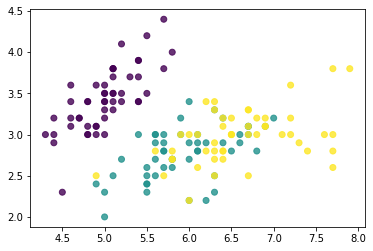

In [2]:
iris = load_iris()

X, y = iris.data, iris.target
print(X.shape)
print(y.shape)
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.8)

In [15]:
xx=X.copy()
yy=y.copy()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=0.8,
        test_size=0.2,
        random_state=5)

Text(0.5, 1.0, 'test set')

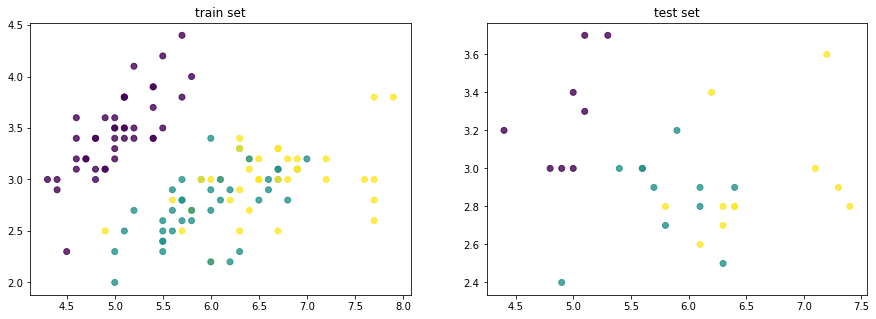

In [4]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,alpha=0.8)
plt.title('train set')
plt.subplot(122)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,alpha=0.8)
plt.title('test set')

In [5]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=1)

model.fit(X_train,y_train)

print(model.score(X_test,y_test))


0.9


amelioration du model

validation set
la cross validation

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(4),
                X_train,y_train,cv=5,
                scoring='accuracy').mean()

0.9666666666666668

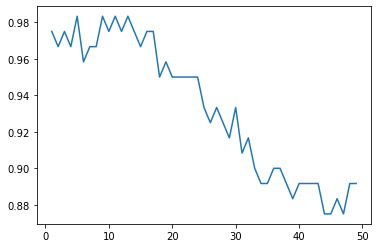

In [7]:
score=[]
for i in range(0,50):
    cross=cross_val_score(KNeighborsClassifier(i),
                X_train,y_train,cv=5,
                scoring='accuracy').mean()
    score.append(cross)
plt.plot(score);

VALIDIATION CIRVE

GRIDSEARCHCV

In [8]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': np.arange(1, 20), 'metric': ['euclidean', 'manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),params,cv=5)
grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [9]:
grid.best_score_

0.9833333333333334

In [10]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [11]:
model_L=grid.best_estimator_
model_L.score(X_test,y_test)

0.9333333333333333

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,model_L.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

LEARNING CURVE

In [13]:
from sklearn.model_selection import learning_curve

n,train,val_lean=learning_curve(model_L,X_train,y_train,
                                train_sizes=np.arange(0.1,1.0,10),
                                cv=5)
val_lean

array([[0.875     , 0.58333333, 0.625     , 0.66666667, 0.66666667]])

[9]


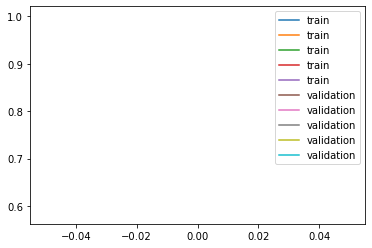

In [14]:
print(n)
plt.plot(train,label='train')
plt.plot(val_lean,label='validation')
plt.legend()

In [32]:
from sklearn.model_selection import KFold,LeaveOneOut,ShuffleSplit,StratifiedKFold,GroupKFold
CV=KFold(5,shuffle=True, random_state=1)
cross_val_score(KNeighborsClassifier(),xx,yy,cv=CV).mean()

0.9533333333333334

In [26]:
L=LeaveOneOut()
ll=cross_val_score(KNeighborsClassifier(),xx,yy,cv=L)

In [31]:
sh=ShuffleSplit(5,test_size=0.2)
cross_val_score(KNeighborsClassifier(),xx,yy,cv=sh).mean()

0.9666666666666668

In [29]:
trat=StratifiedKFold(4)
cross_val_score(KNeighborsClassifier(),xx,yy,cv=trat).mean()

0.9667496443812233

In [30]:
G=GroupKFold(4).get_n_splits(xx,yy,groups=xx[:,0])
cross_val_score(KNeighborsClassifier(),xx,yy,cv=G).mean()

0.9667496443812233